In [1]:
import os
os.getcwd()

#permission to access drive of linked account
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#uploading the dataset zip file to google colab drive
from google.colab import files
files.upload()

!unzip titanic.zip

Mounted at /content/gdrive


Saving titanic.zip to titanic.zip
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

k-nearset algorithm is broken into 3 steps

1. Calculate Euclidean Distance
2. Get Nearest Neighbors
3. Make Predictions

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

PassengerId = 1-891 : Train(891), 892 - 1309 : test (418 rows)


In [4]:
y_train = train['Survived'] # target
train.drop(['Survived'], axis=1, inplace=True)
train = pd.concat([train,test])
train.index = list(range(0,train.shape[0]))

In [5]:
train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [7]:
# Drop Cabin as it has large no. of values missing 
#Embarked as we will not be using it because if we convert those categores into numbers it would not make any sense.
train.drop(['Cabin', 'Embarked'],axis=1, inplace=True)

In [8]:
train.shape

(1309, 9)

<Axes: xlabel='Pclass', ylabel='Age'>

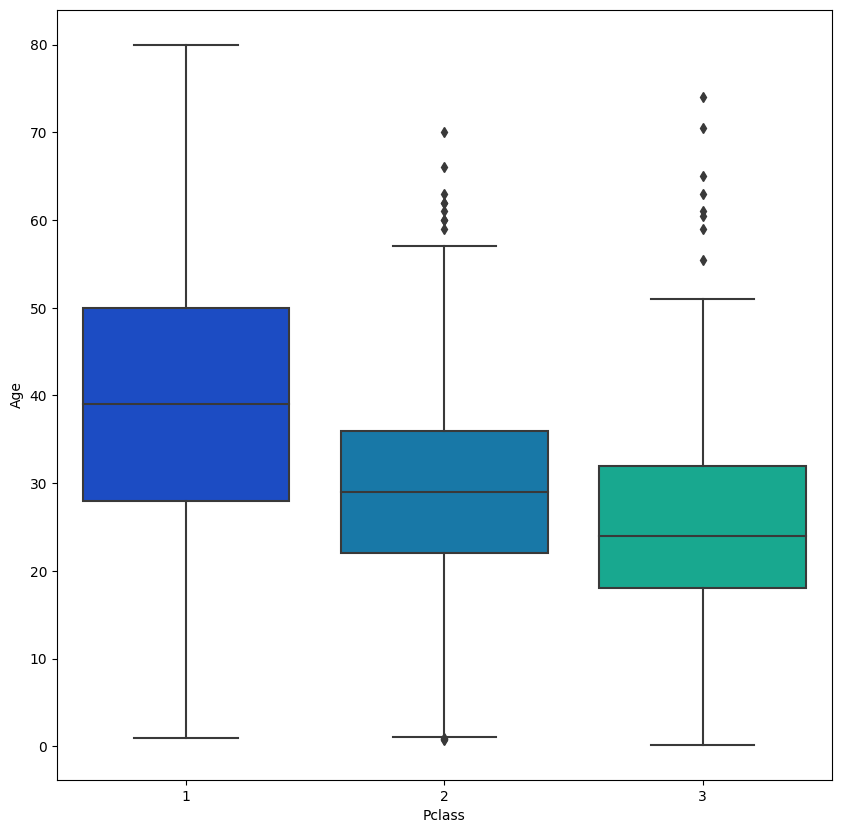

In [9]:
# from boxplot below between age and Pclass attribute we can observe at for different Pclass age mean is differnt
# hence we will replace the missing values in 'Age' with the mean of respective class
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [10]:
#Finding the mean value of each class
train.groupby('Pclass')['Age'].mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [11]:
#Replacing the nan values in age column
def replacena_age(columns):
  Age = columns[0]
  Pclass = columns[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 39
    elif Pclass == 2:
      return 30
    else:
      return 25
  else:
    return Age

In [12]:
train['Age'] = train[['Age','Pclass']].apply(replacena_age, axis=1)

In [13]:
train['Fare'].fillna(train['Fare'].mean(), inplace=True)

In [14]:
train.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

Here,

SibSp: Sibling Sprouse

Parch : Parent child

In [15]:
for ix, row in train.iterrows():
  print(ix)
  print(row)
  print("-------------")

Streaming output truncated to the last 5000 lines.
Sex                                      female
Age                                        47.0
SibSp                                         1
Parch                                         0
Ticket                                   363272
Fare                                        7.0
Name: 892, dtype: object
-------------
893
PassengerId                          894
Pclass                                 2
Name           Myles, Mr. Thomas Francis
Sex                                 male
Age                                 62.0
SibSp                                  0
Parch                                  0
Ticket                            240276
Fare                              9.6875
Name: 893, dtype: object
-------------
894
PassengerId                 895
Pclass                        3
Name           Wirz, Mr. Albert
Sex                        male
Age                        27.0
SibSp                         0
Parch         

In [16]:
for ix, row in train.iteritems():
  print(ix)
  print(row)
  print("-------------")

PassengerId
0          1
1          2
2          3
3          4
4          5
        ... 
1304    1305
1305    1306
1306    1307
1307    1308
1308    1309
Name: PassengerId, Length: 1309, dtype: int64
-------------
Pclass
0       3
1       1
2       3
3       1
4       3
       ..
1304    3
1305    1
1306    3
1307    3
1308    3
Name: Pclass, Length: 1309, dtype: int64
-------------
Name
0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                        

<ipython-input-16-8d52b73b22bb>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, row in train.iteritems():


In [17]:
# Getting family size from Prach and Sibsp

train['family_size'] = train['Parch'] + train['SibSp']

KNN needs numerical features therefore, we will convert them to numbers.

In general sense, binary categorical data can work

For larger categorical groups, it only makes sense when the numerical values itself haev meaning. 

For example, for class levels, the difference between first class and third class actually mean something.

on the other hand, if we convert Embarked to a number, there is no meaning in the difference between embarked1 and embarked2

In [18]:
#appling Label Encoding 
sex_dict = {'female':0, 'male':1}
train['Sex'] = train['Sex'].map(sex_dict)

In [19]:
#appling Label Encoding 
train.loc[:,'Age'] = pd.qcut(train['Age'], 4, labels=False)
train.loc[:,'Fare'] = pd.qcut(train['Fare'], 5, labels=False)

<ipython-input-19-f514d1a12aa8>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:,'Age'] = pd.qcut(train['Age'], 4, labels=False)
<ipython-input-19-f514d1a12aa8>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.loc[:,'Fare'] = pd.qcut(train['Fare'], 5, labels=False)


The pandas documentation describes qcut as a “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.

In [20]:
#dropping unrequired columns
train.drop(['Name','SibSp','Parch', 'Ticket'], axis=1, inplace=True)

In [21]:
attributes = ['Pclass', 'Sex', 'Age', 'Fare', 'family_size']

In [22]:
for fea in attributes:
  print(fea)
  lis = train[fea].unique()
  print(lis)
  print("--------")

Pclass
[3 1 2]
--------
Sex
[1 0]
--------
Age
[0 3 1 2]
--------
Fare
[0 4 1 2 3]
--------
family_size
[ 1  0  4  2  6  5  3  7 10]
--------


**STANDARDIZE THE DATASET**

1. Normalize Data

We use normalization to refer to rescaling an input varibale to range between 0 and 1. 

Normalizatio requires that you know the minimum and maximum values for each attribute

2. Standardize Data

Standardization is a rescaling technique that refers to centering the distribution of the data on the value 0 and the standard deviation to the value 1. 

Together 


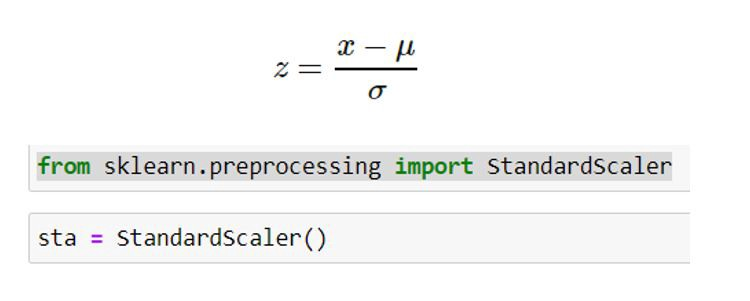

In [23]:
def StandardScaler(train,attributes):
  mean=[]
  std = []
  #calculating the mean and standard deviation of each column
  for fea in attributes:
    mean.append(np.mean(train[fea]))
    std.append(np.std(train[fea]))

  #appling StandardScaler on each element of every column
  for i in range(len(attributes)):
    lis = []
    for x in train[attributes[i]]:
       lis.append((x-mean[i])/std[i])
    train[attributes[i]] = lis
    print(attributes[i] ," : ",train[attributes[i]].unique())
    
  return train

train = StandardScaler(train,attributes)

Pclass  :  [ 0.84191642 -1.54609786 -0.35209072]
Sex  :  [ 0.74349692 -1.34499549]
Age  :  [-1.31648546  1.37193804 -0.42034429  0.47579688]
Fare  :  [-1.39261797  1.41730407 -0.69013746  0.01234305  0.71482356]
family_size  :  [ 0.07335229 -0.55834605  1.96844733  0.70505064  3.23184402  2.60014567
  1.33674898  3.86354236  5.7586374 ]


In [24]:
#Splitting the data into train and test after data processing
test = train.loc[891:1309]
test.index = list(range(test.shape[0]))
train = train.loc[0:890]
train.index = list(range(train.shape[0]))


In [25]:
train

,PassengerId,Pclass,Sex,Age,Fare,family_size
0,1,0.841916,0.743497,-1.316485,-1.392618,0.073352
1,2,-1.546098,-1.344995,1.371938,1.417304,0.073352
2,3,0.841916,-1.344995,-0.420344,-0.690137,-0.558346
3,4,-1.546098,-1.344995,0.475797,1.417304,0.073352
4,5,0.841916,0.743497,0.475797,-0.690137,-0.558346
...,...,...,...,...,...,...
886,887,-0.352091,0.743497,0.475797,0.012343,-0.558346
887,888,-1.546098,-1.344995,-1.316485,0.714824,-0.558346
888,889,0.841916,-1.344995,-0.420344,0.714824,1.336749
889,890,-1.546098,0.743497,-0.420344,0.714824,-0.558346


In [26]:
test

,PassengerId,Pclass,Sex,Age,Fare,family_size
0,892,0.841916,0.743497,0.475797,-1.392618,-0.558346
1,893,0.841916,-1.344995,1.371938,-1.392618,0.073352
2,894,-0.352091,0.743497,1.371938,-0.690137,-0.558346
3,895,0.841916,0.743497,0.475797,-0.690137,-0.558346
4,896,0.841916,-1.344995,-1.316485,0.012343,0.705051
...,...,...,...,...,...,...
413,1305,0.841916,0.743497,-0.420344,-0.690137,-0.558346
414,1306,-1.546098,-1.344995,1.371938,1.417304,-0.558346
415,1307,0.841916,0.743497,1.371938,-1.392618,-0.558346
416,1308,0.841916,0.743497,-0.420344,-0.690137,-0.558346


In [27]:
train.drop(['PassengerId'], axis=1, inplace=True)
test.drop(['PassengerId'], axis=1, inplace=True)

<ipython-input-27-97aa2022ada8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['PassengerId'], axis=1, inplace=True)
<ipython-input-27-97aa2022ada8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['PassengerId'], axis=1, inplace=True)


In [28]:
print(train.shape,test.shape)

(891, 5) (418, 5)


In [29]:
y_train.to_frame()

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [30]:
train['Survived'] = y_train
#.loc[row_indexer,col_indexer] = value

<ipython-input-30-d18b0d0092c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Survived'] = y_train


In [31]:
# x1 : first row, x2 : second row
# value zero means there is no difference between two records
def euclidena_dist (x1,x2):
  dis = 0.0
  # Alternative np.sum()
  for i in range(len(x1)):
    dis = dis + (x1[i] - x2[i] )**2
  return np.sqrt(dis)

Using our distance function we will now find the closest match in our dataset when providing a vector.

In [32]:
def k_nearest_neighbor_list(test_case, train, nearest_neighbor=1, ignore_col = ['Survived']):

  distances = []
  for ix,row in train.loc[:,~train.columns.isin(ignore_col)].iterrows():
  
      #calculating the euclidean distance
      dist = euclidena_dist (test_case,row) 
      distances.append((dist,ix)) 
  
  #storing the index of distances in ascending order of distance
  indices = [i[1] for i in sorted(distances, key= lambda i : i[0])] 
  
  neighbors = train.loc[indices[:nearest_neighbor]]
  
  return neighbors

# Function to return the dominat class among the K nearest neighbor Dataset returned
def predict_result(test_case_series, train, nearest_neighbor=1, y='Survived'):
    
    neighbors = k_nearest_neighbor_list(test_case_series, train, nearest_neighbor)
    res = 1 if neighbors[neighbors[y] == 1].count()[0] > neighbors[neighbors[y] == 0].count()[0] else 0
    return res

def accuracy_cal(actual, pred):
  count = 0 
  for i in list(range(len(actual))):
    if actual['Survived'][i] == pred['Survived'][i] :
        count = count + 1
  return count/float(len(actual))*100


                                                  

In [33]:
actual_val = pd.read_csv('gender_submission.csv') 
lis = {} 

In [34]:
#calculating accuracy from 1 to 50
for i in list(range(1,50)):
  val = []
  k=i
  for ind,row in test.iterrows():
    val.append(predict_result(row,train,k))
  pred_val = pd.DataFrame(val,columns=['Survived'])
  acc=accuracy_cal(actual_val,pred_val)
  print("Accuracy is : ",i," : ",acc )
  lis[i]=acc

Accuracy is :  1  :  82.05741626794259
Accuracy is :  2  :  83.01435406698565
Accuracy is :  3  :  83.97129186602871
Accuracy is :  4  :  89.95215311004785
Accuracy is :  5  :  89.71291866028707
Accuracy is :  6  :  88.27751196172248
Accuracy is :  7  :  88.99521531100478
Accuracy is :  8  :  87.79904306220095
Accuracy is :  9  :  87.5598086124402
Accuracy is :  10  :  87.32057416267942
Accuracy is :  11  :  89.95215311004785
Accuracy is :  12  :  90.43062200956938
Accuracy is :  13  :  91.6267942583732
Accuracy is :  14  :  89.71291866028707
Accuracy is :  15  :  90.9090909090909
Accuracy is :  16  :  90.66985645933015
Accuracy is :  17  :  89.95215311004785
Accuracy is :  18  :  88.51674641148325
Accuracy is :  19  :  91.86602870813397
Accuracy is :  20  :  91.38755980861244
Accuracy is :  21  :  92.10526315789474
Accuracy is :  22  :  91.14832535885168
Accuracy is :  23  :  91.86602870813397
Accuracy is :  24  :  94.01913875598086
Accuracy is :  25  :  94.73684210526315
Accuracy is 

In [35]:
  val = []
  k=10
  for ind,row in test.iterrows():
    val.append(predict_result(row,train,k))
  pred_val = pd.DataFrame(val,columns=['Survived'])
  print("Accuracy is : " , accuracy_cal(actual_val,pred_val))

Accuracy is :  87.32057416267942


In [ ]:
#calculating accuracy from 50 to 100
for i in list(range(50,100)):
  val = []
  k=i
  for ind,row in test.iterrows():
    val.append(predict_result(row,train,k))
  pred_val = pd.DataFrame(val,columns=['Survived'])
  acc=accuracy_cal(actual_val,pred_val)
  print("Accuracy is : ",i," : ",acc )
  lis[i]=acc

**Maximum accuracy : 98.8 at k=48**

In [38]:
lis = sorted(lis.items(), key = lambda x:x[0])

In [39]:
lis

[(1, 82.05741626794259),
 (2, 83.01435406698565),
 (3, 83.97129186602871),
 (4, 89.95215311004785),
 (5, 89.71291866028707),
 (6, 88.27751196172248),
 (7, 88.99521531100478),
 (8, 87.79904306220095),
 (9, 87.5598086124402),
 (10, 87.32057416267942),
 (11, 89.95215311004785),
 (12, 90.43062200956938),
 (13, 91.6267942583732),
 (14, 89.71291866028707),
 (15, 90.9090909090909),
 (16, 90.66985645933015),
 (17, 89.95215311004785),
 (18, 88.51674641148325),
 (19, 91.86602870813397),
 (20, 91.38755980861244),
 (21, 92.10526315789474),
 (22, 91.14832535885168),
 (23, 91.86602870813397),
 (24, 94.01913875598086),
 (25, 94.73684210526315),
 (26, 94.25837320574163),
 (27, 95.45454545454545),
 (28, 96.41148325358851),
 (29, 96.88995215311004),
 (30, 95.93301435406698),
 (31, 94.73684210526315),
 (32, 96.88995215311004),
 (33, 96.41148325358851),
 (34, 96.88995215311004),
 (35, 96.88995215311004),
 (36, 97.60765550239235),
 (37, 98.08612440191388),
 (38, 98.08612440191388),
 (39, 97.84688995215312)

In [40]:
#extracting values and convering into individal list
x = list(list(zip(*lis))[0])
y = list(list(zip(*lis))[1])

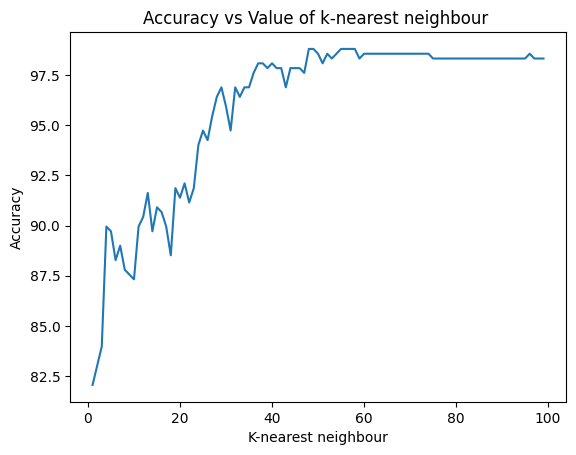

In [41]:
plt.title('Accuracy vs Value of k-nearest neighbour ')
plt.plot(x, y)
plt.xlabel('K-nearest neighbour')
plt.ylabel('Accuracy')
plt.show()